### Working with already created model and coefficients
Cuando trabajamos con un modelo y coeficientes ya generados, es mas sencillo

In [1]:
import pyEXP
import EXPtools
import h5py
import numpy as np

In [278]:
pyEXP?
"""
Version information
-----------------------
Version:          EXP 7.7.28
Repository URL:   https://github.com/EXP-code/EXP
GIT branch:       pyEXPfix
GIT commit:       50566b3ff70eb6debf3bf62d814ce9db7694a8c9
Compile time:     2024-03-28 13:07:55 UTC
"""

'\nVersion information\n-----------------------\nVersion:          EXP 7.7.28\nRepository URL:   https://github.com/EXP-code/EXP\nGIT branch:       pyEXPfix\nGIT commit:       50566b3ff70eb6debf3bf62d814ce9db7694a8c9\nCompile time:     2024-03-28 13:07:55 UTC\n'

Type:        module
String form: <module 'pyEXP' from '/usr/local/EXP/lib/python3.10/site-packages/pyEXP.cpython-310-x86_64-linux-gnu.so'>
File:        /usr/local/EXP/lib/python3.10/site-packages/pyEXP.cpython-310-x86_64-linux-gnu.so
Docstring:  
pyEXP
=====
Provides a collection of EXP tools for processing and analyzing
simulation data using BFE techniques and MSSA.

How to get started
------------------
The main documentation is the many docstrings embedded in the
code and a set of examples provided with the EXP source.  We hope
to provide a online reference guide in the future.

We recommend beginning with the example Python scripts and IPython
notebooks and adapting them to your own needs. You can explore
the available classes and member functions using the usual Python
``help'' function.  The classes are organized into seven submodules
that are described briefly below.  Run 'help(pyEXP.xxxx) for each
of the submodules below for more detailed usage info...

The available submodules

In [3]:
model = 'Hernquist'
Hern_config = EXPtools.basis_builder.basis_utils.make_config('sphereSL',lmax=6,nmax=20,
                                             modelname=f'{model}_model.txt',cachename=f'{model}_halo.cache',
                                             numr=200, rmin=2.5, rmax=300, scale=1)
Hern_basis = pyEXP.basis.Basis.factory(Hern_config)
Hern_coefs = pyEXP.coefs.Coefs.factory('Hernquist_halo.h5')

---- SLGridSph::ReadH5Cache: parameter numr: wanted 200 found 201
---- SLGridSph::WriteH5Cache cache file <Hernquist_halo.cache> exists
---- SLGridSph::WriteH5Cache: existing file backed up to <Hernquist_halo.cache.bak>
---- SLGridSph::WriteH5Cache: wrote <Hernquist_halo.cache>
SphericalSL::orthoTest: worst=0.0231541


In [4]:
model = 'NFW'
NFW_config = EXPtools.basis_builder.basis_utils.make_config('sphereSL',lmax=6,nmax=20,
                                             modelname=f'{model}_model.txt',cachename=f'{model}_halo.cache',
                                             numr=500, rmin=2.5, rmax=300, scale=1)
NFW_basis = pyEXP.basis.Basis.factory(NFW_config)
NFW_coefs = pyEXP.coefs.Coefs.factory('NFW_halo.h5')

---- SLGridSph::ReadH5Cache: parameter numr: wanted 500 found 501
---- SLGridSph::WriteH5Cache cache file <NFW_halo.cache> exists
---- SLGridSph::WriteH5Cache: existing file backed up to <NFW_halo.cache.bak>
---- SLGridSph::WriteH5Cache: wrote <NFW_halo.cache>
SphericalSL::orthoTest: worst=0.0429877


Text(0.5, 0.98, 'Orthogonal tests')

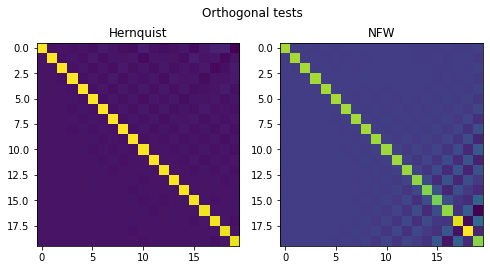

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(8,4))

ax[0].imshow(Hern_basis.orthoCheck()[0])
ax[1].imshow(NFW_basis.orthoCheck()[0])
ax[0].set_title('Hernquist')
ax[1].set_title('NFW')

fig.suptitle('Orthogonal tests')

#### Extraccion de perfiles de las bases

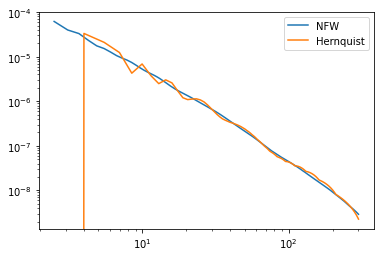

In [21]:
field = 'dens'

rad_NFW, field_dens_NFW = EXPtools.visuals.visualize.spherical_avg_prop(NFW_basis,NFW_coefs, rmin=2.5, rmax=300, nbins=500, log_space=False, time=0, property=field, include_monopole=False)
rad_Hern, field_dens_Hern = EXPtools.visuals.visualize.spherical_avg_prop(Hern_basis,Hern_coefs, rmin=2.5, rmax=300, nbins=200, log_space=False, time=0, property=field, include_monopole=False)
plt.plot(rad_NFW, field_dens_NFW, label='NFW')
plt.plot(rad_Hern, field_dens_Hern, label='Hernquist')
plt.xscale('log')
plt.yscale('log')
plt.legend()

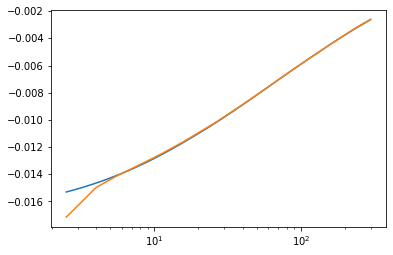

In [23]:
field = 'pot'

rad_NFW, field_pot_NFW = EXPtools.visuals.visualize.spherical_avg_prop(NFW_basis,NFW_coefs, rmin=2.5, rmax=300, nbins=500, log_space=False, time=0, property=field, include_monopole=False)
rad_Hern, field_pot_Hern = EXPtools.visuals.visualize.spherical_avg_prop(Hern_basis,Hern_coefs, rmin=2.5, rmax=300, nbins=200, log_space=False, time=0, property=field, include_monopole=False)
plt.plot(rad_NFW, field_pot_NFW)
plt.plot(rad_Hern, field_pot_Hern)
plt.xscale('log')

### Comparing with empirical values

In [24]:
id = 372754
# Obtained from the header file
HubbleParam  =  0.6774
Omega0  =  0.3089
OmegaLambda  =  0.6911
Redshift  =  2.220446049250313e-16
Time  =  0.9999999999999998 # Is also defined as the scale factor a, since z~0, a~1
with h5py.File(f"subhalo_{id}.hdf5", "r") as file:
    print(file['99/dm'].keys())
    pos = np.array(file['99/dm/Coordinates_centered'])
    radius = np.array(file['99/dm/Distance_to_center'])
    mass = np.full(pos.shape[0],3.1e5/HubbleParam)

<KeysViewHDF5 ['Coordinates', 'Coordinates_centered', 'Distance_to_center', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'Velocities', 'count']>


In [25]:
bins = 500
rmin, rmax = 2.5,300
rbins = np.linspace(rmin,rmax,bins)

In [271]:
R = np.linalg.norm(pos,axis=1)
max(R)
filtr = np.where((R < 300) & (R > 2.5))[0]

In [272]:
emp_dens = EXPtools.basis_builder.makemodel.empirical_density_profile(rbins,pos[filtr],mass[filtr]/sum(mass[filtr]))

(None, None, Text(0, 0.5, 'mass density'), Text(0.5, 0, 'Radius(kpc)'))

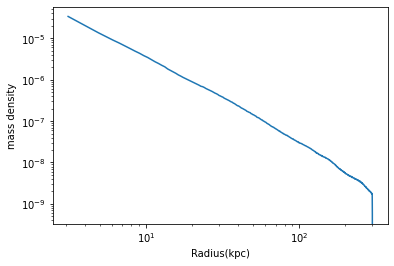

In [273]:
plt.plot(rbins[1:],emp_dens)
plt.xscale('log'),plt.yscale('log'),plt.ylabel('mass density'),plt.xlabel('Radius(kpc)')

#### Modelos base en comparacion al empirico

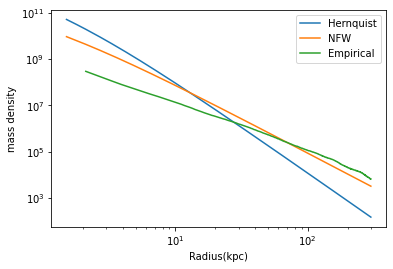

In [71]:
# Comparando con orden cero
emp_dens_nonorm = EXPtools.basis_builder.makemodel.empirical_density_profile(rbins,pos,mass)

fig, ax = plt.subplots(1,1,figsize=(6,4))

read_model = np.loadtxt('Hernquist_model.txt', skiprows=3)
ax.plot(read_model[:,0],read_model[:,1], label='Hernquist')
ax.set_xscale('log')
ax.set_yscale('log')

read_model = np.loadtxt('NFW_model.txt', skiprows=3)
ax.plot(read_model[:,0],read_model[:,1], label='NFW')

ax.plot(rbins[1:],emp_dens_nonorm, label='Empirical')
ax.set_xscale('log'),ax.set_yscale('log'),ax.set_ylabel('mass density'),ax.set_xlabel('Radius(kpc)')

ax.legend()

#### Ahora utilizando los perfiles de las bases
comparando perfil empirico con el obtenido de la expansion completa

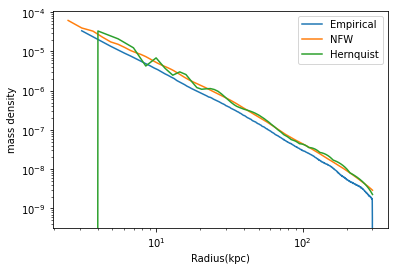

In [274]:
rad_NFW, field_dens_NFW = EXPtools.visuals.visualize.spherical_avg_prop(NFW_basis,NFW_coefs, rmin=2.5, rmax=300, nbins=500, log_space=False, time=0, property='dens', include_monopole=False)
rad_Hern, field_dens_Hern = EXPtools.visuals.visualize.spherical_avg_prop(Hern_basis,Hern_coefs, rmin=2.5, rmax=300, nbins=200, log_space=False, time=0, property='dens', include_monopole=False)

fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(rbins[1:],emp_dens, label='Empirical')
ax.plot(rad_NFW[:], field_dens_NFW[:], label='NFW')
ax.plot(rad_Hern, field_dens_Hern, label='Hernquist')

ax.set_xscale('log'),ax.set_yscale('log'),ax.set_ylabel('mass density'),ax.set_xlabel('Radius(kpc)')
ax.legend()

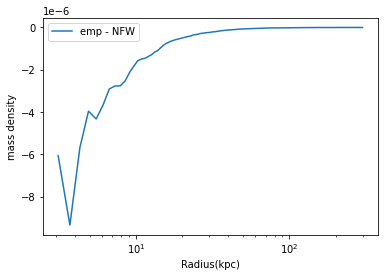

In [275]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(rbins[1:],emp_dens - field_dens_NFW[1:], label='emp - NFW')

ax.set_xscale('log'),ax.set_ylabel('mass density'),ax.set_xlabel('Radius(kpc)')
ax.legend()

/tmp/ipykernel_5886/4015087314.py:3: RuntimeWarning: divide by zero encountered in divide
  ax.plot(rbins[1:],abs(emp_dens - field_dens_NFW[1:])/emp_dens, label='Error NFW')


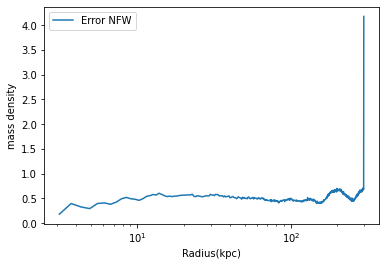

In [276]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(rbins[1:],abs(emp_dens - field_dens_NFW[1:])/emp_dens, label='Error NFW')

ax.set_xscale('log'),ax.set_ylabel('mass density'),ax.set_xlabel('Radius(kpc)')
ax.legend()

#### Comparando slices de Hernquist y NFW

In [277]:
def empirical_slice(pos, mass,
                    projection='XY', proj_plane=0, Lz= 1e-1,
                    npoints=300, grid_limits=(-300,300),
                    prop='dens'):
    if projection not in ['XY','XZ','YZ']:
        raise valueError('Invalid Projection, must be XY, XZ , or YZ')
    if projection == 'XY':
        in_slice = np.where(abs(pos[:,2]) < proj_plane+Lz)[0]
    elif projection == 'XZ':
        in_slice = np.where(abs(pos[:,1]) < proj_plane+Lz)[0]
    elif projection == 'YZ':
        in_slice = np.where(abs(pos[:,0]) < proj_plane+Lz)[0]
    pos_slice,mass_slice = pos[in_slice,:],mass[in_slice]
    print(pos_slice.shape)
    rho, xbins, ybins = np.histogram2d(pos_slice[:,0],pos_slice[:,1],bins=npoints, weights=mass_slice**-1,
                                       range=[[grid_limits[0],grid_limits[1]],[grid_limits[0],grid_limits[1]]])
    rho = rho/Lz
    return (xbins[0:-1], ybins[0:-1], rho)

1120.7685795798416

In [57]:
x = np.linspace(-300,300,300)
xgrid = np.meshgrid(x,x)

In [106]:
xgrid[0]

array([[-300.        , -297.99331104, -295.98662207, ...,  295.98662207,
         297.99331104,  300.        ],
       [-300.        , -297.99331104, -295.98662207, ...,  295.98662207,
         297.99331104,  300.        ],
       [-300.        , -297.99331104, -295.98662207, ...,  295.98662207,
         297.99331104,  300.        ],
       ...,
       [-300.        , -297.99331104, -295.98662207, ...,  295.98662207,
         297.99331104,  300.        ],
       [-300.        , -297.99331104, -295.98662207, ...,  295.98662207,
         297.99331104,  300.        ],
       [-300.        , -297.99331104, -295.98662207, ...,  295.98662207,
         297.99331104,  300.        ]])

(180633, 3)


/tmp/ipykernel_5886/851270431.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(xbins,ybins,np.log10(rho))
/tmp/ipykernel_5886/851270431.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.contour(xbins,ybins,np.log10(rho), zorder=100, c='k')
/tmp/ipykernel_5886/851270431.py:4: UserWarning: The following kwargs were not used by contour: 'c'
  plt.contour(xbins,ybins,np.log10(rho), zorder=100, c='k')


((300, 300), 0.01840561354838938)

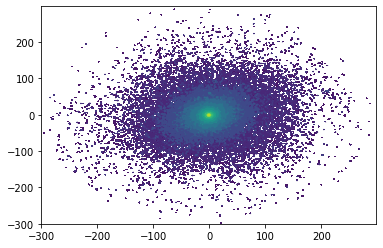

In [258]:
filtr = np.where(R < 300)
xbins, ybins, rho = empirical_slice(pos[filtr],mass[filtr], Lz=1)
plt.contourf(xbins,ybins,np.log10(rho))
plt.contour(xbins,ybins,np.log10(rho), zorder=100, c='k')
rho.shape,rho[150,150]

In [129]:
NFWdens0, NFWdens, NFWxgrid = EXPtools.visuals.visualize.slice_fields(NFW_basis,NFW_coefs)

In [130]:
Herndens0, Herndens, Hernxgrid = EXPtools.visuals.visualize.slice_fields(Hern_basis,Hern_coefs)

In [222]:
NFWdens.shape,Herndens.shape,rho.shape,NFWdens[150,150],Herndens[150,150],rho[150,150],NFWxgrid[:],Hernxgrid[:],xbins,ybins

((300, 300),
 (300, 300),
 (300, 300),
 2.8367223813184113e-05,
 0.00023209492856539392,
 0.01840561354838938,
 [array([[-300.        , -297.99331104, -295.98662207, ...,  295.98662207,
           297.99331104,  300.        ],
         [-300.        , -297.99331104, -295.98662207, ...,  295.98662207,
           297.99331104,  300.        ],
         [-300.        , -297.99331104, -295.98662207, ...,  295.98662207,
           297.99331104,  300.        ],
         ...,
         [-300.        , -297.99331104, -295.98662207, ...,  295.98662207,
           297.99331104,  300.        ],
         [-300.        , -297.99331104, -295.98662207, ...,  295.98662207,
           297.99331104,  300.        ],
         [-300.        , -297.99331104, -295.98662207, ...,  295.98662207,
           297.99331104,  300.        ]]),
  array([[-300.        , -300.        , -300.        , ..., -300.        ,
          -300.        , -300.        ],
         [-297.99331104, -297.99331104, -297.99331104, ..., -

/tmp/ipykernel_5886/3603021071.py:3: RuntimeWarning: invalid value encountered in log10
  NFWcont = ax[0,0].contourf(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens))
/tmp/ipykernel_5886/3603021071.py:5: RuntimeWarning: invalid value encountered in log10
  ax[0,0].contour(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens), zorder=100, colors='k')
/tmp/ipykernel_5886/3603021071.py:9: RuntimeWarning: invalid value encountered in log10
  Herncont = ax[0,1].contourf(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens))
/tmp/ipykernel_5886/3603021071.py:11: RuntimeWarning: invalid value encountered in log10
  ax[0,1].contour(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens), zorder=100, colors='k')
/tmp/ipykernel_5886/3603021071.py:22: RuntimeWarning: divide by zero encountered in log10
  empcont = ax[1,0].contourf(xbins,ybins,np.log10(rho))
/tmp/ipykernel_5886/3603021071.py:28: RuntimeWarning: invalid value encountered in log10
  NFWcont = ax[1,1].contourf(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens))
/tmp/ipykernel_5886

(-300.0, 298.0, -300.0, 298.0)

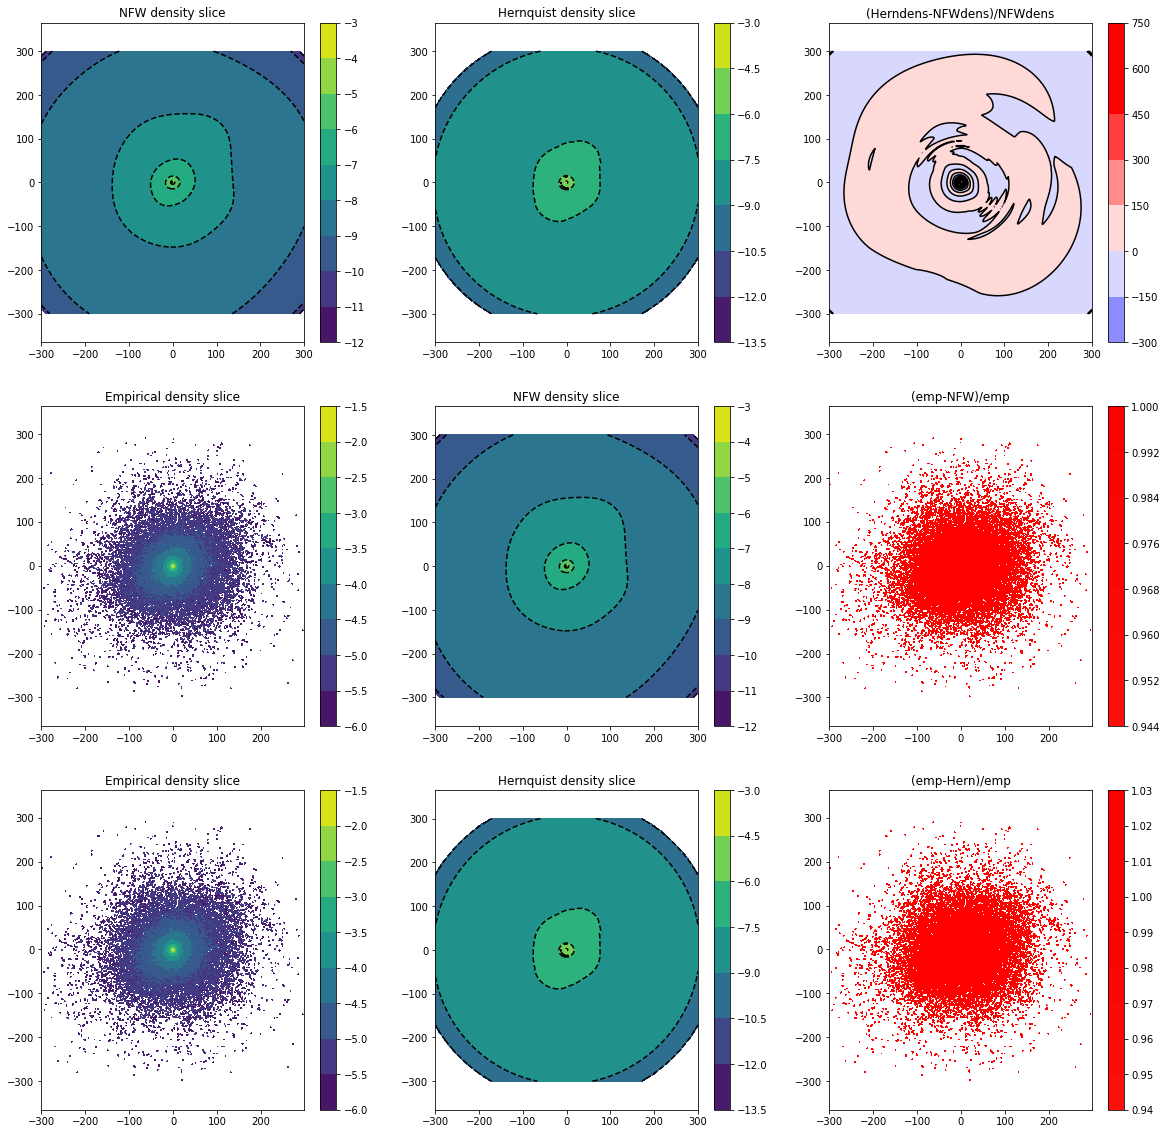

In [253]:
fig, ax = plt.subplots(3,3,figsize=(20,20))

NFWcont = ax[0,0].contourf(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens))
plt.colorbar(NFWcont)
ax[0,0].contour(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens), zorder=100, colors='k')
ax[0,0].set_title('NFW density slice')
ax[0,0].axis('equal')

Herncont = ax[0,1].contourf(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens))
plt.colorbar(Herncont)
ax[0,1].contour(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens), zorder=100, colors='k')
ax[0,1].set_title('Hernquist density slice')
ax[0,1].axis('equal')

diff = (Herndens-NFWdens)/NFWdens
diffcont = ax[0,2].contourf(Hernxgrid[0],Hernxgrid[1],diff,cmap='bwr',vmin=-500,vmax=500)
cbar = plt.colorbar(diffcont)
ax[0,2].contour(Hernxgrid[0],Hernxgrid[1],(NFWdens-Herndens)/NFWdens, zorder=100, colors='k')
ax[0,2].set_title('(Herndens-NFWdens)/NFWdens')
ax[0,2].axis('equal')

empcont = ax[1,0].contourf(xbins,ybins,np.log10(rho))
plt.colorbar(empcont)
#ax[1,0].contour(xbins,ybins,np.log10(rho), zorder=100, colors='k')
ax[1,0].set_title('Empirical density slice')
ax[1,0].axis('equal')

NFWcont = ax[1,1].contourf(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens))
plt.colorbar(NFWcont)
ax[1,1].contour(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens), zorder=100, colors='k')
ax[1,1].set_title('NFW density slice')
ax[1,1].axis('equal')

diff = (rho-NFWdens)/rho
diffcont = ax[1,2].contourf(xbins,ybins,diff,cmap='bwr',vmin=-1,vmax=1)
cbar = plt.colorbar(diffcont)
ax[1,2].set_title('(emp-NFW)/emp')
ax[1,2].axis('equal')

empcont = ax[2,0].contourf(xbins,ybins,np.log10(rho))
plt.colorbar(empcont)
#ax[1,0].contour(xbins,ybins,np.log10(rho), zorder=100, colors='k')
ax[2,0].set_title('Empirical density slice')
ax[2,0].axis('equal')

Herncont = ax[2,1].contourf(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens))
plt.colorbar(Herncont)
ax[2,1].contour(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens), zorder=100, colors='k')
ax[2,1].set_title('Hernquist density slice')
ax[2,1].axis('equal')

diff = (rho-Herndens)/rho
diffcont = ax[2,2].contourf(xbins,ybins,diff,cmap='bwr',vmin=-1,vmax=1)
cbar = plt.colorbar(diffcont)
ax[2,2].set_title('(emp-Hern)/emp')
ax[2,2].axis('equal')

/tmp/ipykernel_5886/2332152054.py:3: RuntimeWarning: invalid value encountered in log10
  NFWcont = ax[0,0].contourf(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens))
/tmp/ipykernel_5886/2332152054.py:5: RuntimeWarning: invalid value encountered in log10
  ax[0,0].contour(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens), zorder=100, colors='k')
/tmp/ipykernel_5886/2332152054.py:9: RuntimeWarning: invalid value encountered in log10
  Herncont = ax[0,1].contourf(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens))
/tmp/ipykernel_5886/2332152054.py:11: RuntimeWarning: invalid value encountered in log10
  ax[0,1].contour(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens), zorder=100, colors='k')
/tmp/ipykernel_5886/2332152054.py:22: RuntimeWarning: divide by zero encountered in log10
  empcont = ax[1,0].contourf(xbins,ybins,np.log10(rho/100))
/tmp/ipykernel_5886/2332152054.py:28: RuntimeWarning: invalid value encountered in log10
  NFWcont = ax[1,1].contourf(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens))
/tmp/ipykernel_

(-300.0, 298.0, -300.0, 298.0)

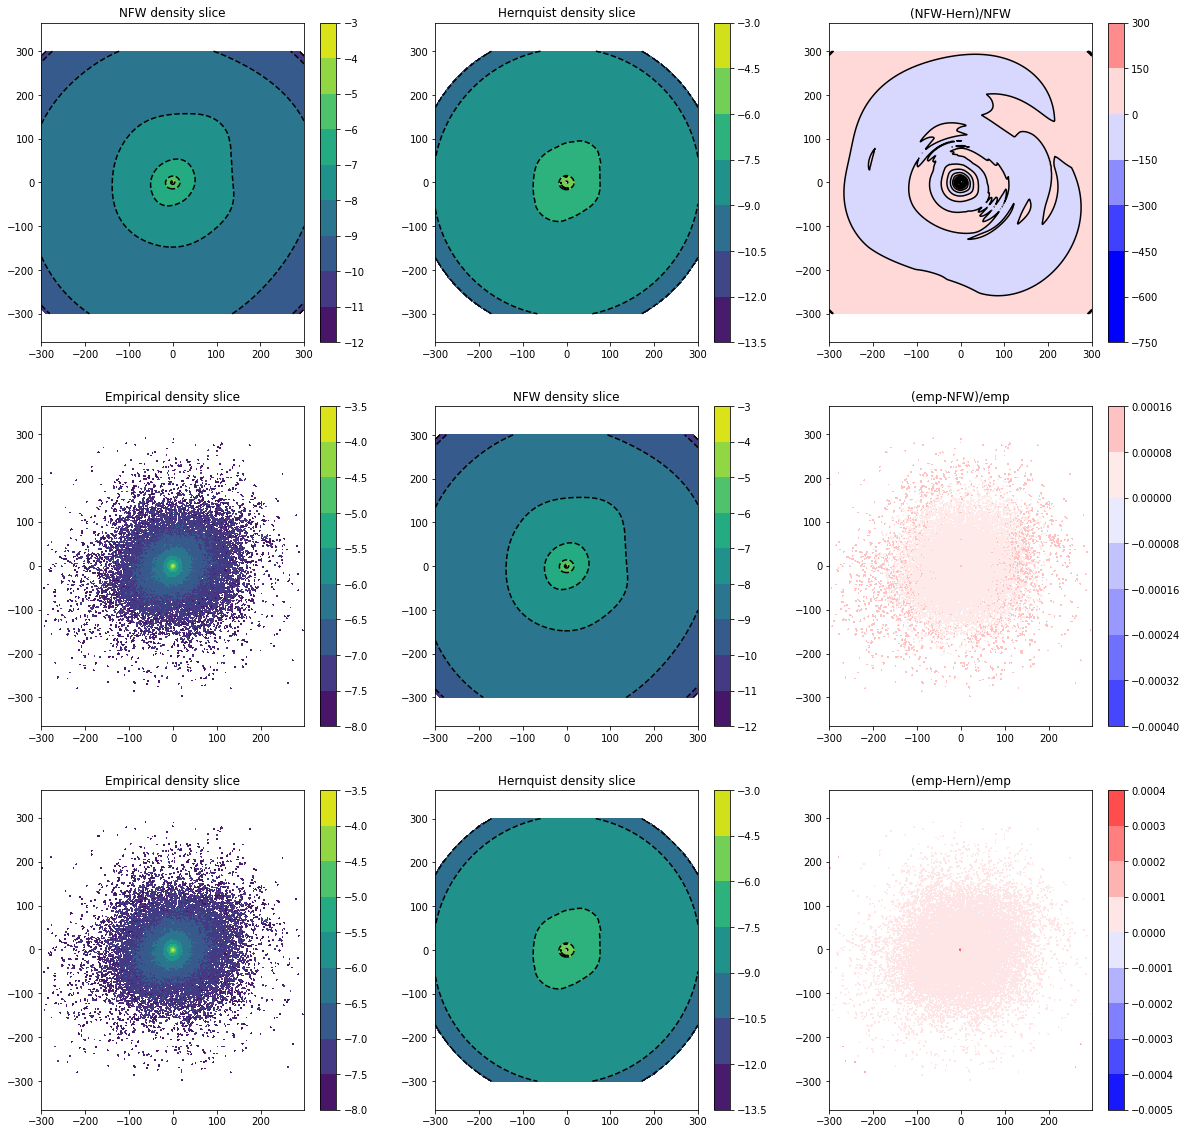

In [233]:
fig, ax = plt.subplots(3,3,figsize=(20,20))

NFWcont = ax[0,0].contourf(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens))
plt.colorbar(NFWcont)
ax[0,0].contour(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens), zorder=100, colors='k')
ax[0,0].set_title('NFW density slice')
ax[0,0].axis('equal')

Herncont = ax[0,1].contourf(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens))
plt.colorbar(Herncont)
ax[0,1].contour(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens), zorder=100, colors='k')
ax[0,1].set_title('Hernquist density slice')
ax[0,1].axis('equal')

diff = (NFWdens-Herndens)/NFWdens
diffcont = ax[0,2].contourf(Hernxgrid[0],Hernxgrid[1],diff,cmap='bwr',vmin=-500,vmax=500)
cbar = plt.colorbar(diffcont)
ax[0,2].contour(Hernxgrid[0],Hernxgrid[1],(NFWdens-Herndens)/NFWdens, zorder=100, colors='k')
ax[0,2].set_title('(NFW-Hern)/NFW')
ax[0,2].axis('equal')

empcont = ax[1,0].contourf(xbins,ybins,np.log10(rho/100))
plt.colorbar(empcont)
#ax[1,0].contour(xbins,ybins,np.log10(rho), zorder=100, colors='k')
ax[1,0].set_title('Empirical density slice')
ax[1,0].axis('equal')

NFWcont = ax[1,1].contourf(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens))
plt.colorbar(NFWcont)
ax[1,1].contour(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens), zorder=100, colors='k')
ax[1,1].set_title('NFW density slice')
ax[1,1].axis('equal')

diff = (rho/100-NFWdens)/rho/100
diffcont = ax[1,2].contourf(xbins,ybins,diff,cmap='bwr',vmin=-5e-4,vmax=5e-4)
cbar = plt.colorbar(diffcont)
ax[1,2].set_title('(emp-NFW)/emp')
ax[1,2].axis('equal')

empcont = ax[2,0].contourf(xbins,ybins,np.log10(rho/100))
plt.colorbar(empcont)
#ax[1,0].contour(xbins,ybins,np.log10(rho), zorder=100, colors='k')
ax[2,0].set_title('Empirical density slice')
ax[2,0].axis('equal')

Herncont = ax[2,1].contourf(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens))
plt.colorbar(Herncont)
ax[2,1].contour(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens), zorder=100, colors='k')
ax[2,1].set_title('Hernquist density slice')
ax[2,1].axis('equal')

diff = (rho/100-Herndens)/rho/100
diffcont = ax[2,2].contourf(xbins,ybins,diff,cmap='bwr',vmin=-5e-4,vmax=5e-4)
cbar = plt.colorbar(diffcont)
ax[2,2].set_title('(emp-Hern)/emp')
ax[2,2].axis('equal')

#### hernquist test

In [65]:
model = 'hernq'
hernq_config = EXPtools.basis_builder.basis_utils.make_config('sphereSL',lmax=6,nmax=20,
                                                              modelname=f'{model}_model.txt',cachename=f'{model}_halo.cache',
                                                              numr=1000, rmin=1.5, rmax=300, scale=1)
hernq_basis = pyEXP.basis.Basis.factory(Hern_config)
hernq_coefs = pyEXP.coefs.Coefs.factory('hernq_halo.h5')

---- SLGridSph::ReadH5Cache: parameter numr: wanted 1000 found 1001
---- SLGridSph::WriteH5Cache cache file <Hernquist_halo.cache> exists
---- SLGridSph::WriteH5Cache: existing file backed up to <Hernquist_halo.cache.bak>
---- SLGridSph::WriteH5Cache: wrote <Hernquist_halo.cache>
SphericalSL::orthoTest: worst=0.00102657


In [67]:
rad_hernq, field_hernq = EXPtools.visuals.visualize.spherical_avg_prop(hernq_basis,hernq_coefs, rmin=1.5, rmax=300, nbins=500, log_space=False, time=0, property=field)

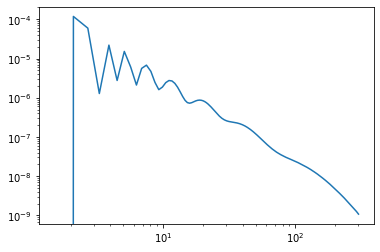

In [68]:
plt.plot(rad_hernq, field_hernq) 
plt.xscale('log')
plt.yscale('log')